In this notebook we will use Skyrim to get wind speed estimates 
for a given location for the upcoming week.

🛑
This notebook would work only if you have a GPU w/ ~24Gb ram.
But check it out anyways!

🪁
Say you are going to Akyaka, Turkey for kitesurfing and you want to know
what the wind speed will be like for the upcoming week. 

Our approach:
1. Initialize a pangu model
2. Get global predictions
3. Visualize global predictions (cause it is super cool!)
4. Get local wind speed forecasts and visualize them

Want to contribute ❤️? 
Compare our predictions with IFS predictions using [ecmwf-opendata](https://github.com/ecmwf/ecmwf-opendata) 


In [1]:
from skyrim.core import Skyrim

In [2]:
# to see all the available models
Skyrim.list_available_models()

['pangu', 'fourcastnet', 'fourcastnet_v2', 'dlwp', 'graphcast']

In [3]:
# 1
# lets initialize a pangu model using Skyrim
# this will download the model if not already cached - could take a couple of minutes
model = Skyrim("pangu", ic_source="gfs")

2024-05-07 15:15:02.122 | DEBUG    | skyrim.core.models.base:__init__:19 - Building pangu model...
2024-05-07 15:15:53.474 | DEBUG    | skyrim.core.models.base:__init__:21 - Building gfs data source...
2024-05-07 15:15:53.476 | SUCCESS  | skyrim.core.models.base:__init__:23 - Initialized pangu in 51.4 seconds
2024-05-07 15:15:53.477 | DEBUG    | skyrim.core.skyrim:__init__:38 - Initialized PanguModel(model_name=pangu) model with initial conditions from gfs


In [4]:
import datetime

today = datetime.datetime.now().date().strftime("%Y%m%d")
print(f"Today's date: {today}")

Today's date: 20240507


In [5]:
# comment out the following two lines to see the warnings and logs
import loguru; loguru.logger.disable("skyrim")
import warnings; warnings.filterwarnings("ignore")

In [7]:
# 2
# first predict method fetches the initial conditions from gfs
# then runs the model and saves the rolled out predictions to disk
# final_pred: PanguPrediction: is the final prediction object
# pred_paths: list[Path]: is the list of paths to the saved predictions

final_pred, pred_paths = model.predict(
    date=today, time="0000", lead_time=24 * 7, save=True
)

100%|██████████| 69/69 [00:03<00:00, 20.33it/s]


In [8]:
# see the paths saved snapshots of the predictions
print(len(pred_paths))
pred_paths[0:3]

28


['/root/skyrim/outputs/Bpr25Vr1Ym/pangu__gfs__20240507_00:00__20240507_06:00.nc',
 '/root/skyrim/outputs/Bpr25Vr1Ym/pangu__file__20240507_06:00__20240507_12:00.nc',
 '/root/skyrim/outputs/Bpr25Vr1Ym/pangu__file__20240507_12:00__20240507_18:00.nc']

In [9]:
# see the coords of the prediction
final_pred.coords

Coordinates:
  * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * channel  (channel) <U5 'z1000' 'z925' 'z850' 'z700' ... 'u10m' 'v10m' 't2m'
  * time     (time) datetime64[ns] 2024-05-13T18:00:00 2024-05-14

In [10]:
# see the variables/channels in the prediction
final_pred.channels

<xarray.DataArray 'channel' (channel: 69)>
array(['z1000', 'z925', 'z850', 'z700', 'z600', 'z500', 'z400', 'z300', 'z250',
       'z200', 'z150', 'z100', 'z50', 'q1000', 'q925', 'q850', 'q700', 'q600',
       'q500', 'q400', 'q300', 'q250', 'q200', 'q150', 'q100', 'q50', 't1000',
       't925', 't850', 't700', 't600', 't500', 't400', 't300', 't250', 't200',
       't150', 't100', 't50', 'u1000', 'u925', 'u850', 'u700', 'u600', 'u500',
       'u400', 'u300', 'u250', 'u200', 'u150', 'u100', 'u50', 'v1000', 'v925',
       'v850', 'v700', 'v600', 'v500', 'v400', 'v300', 'v250', 'v200', 'v150',
       'v100', 'v50', 'msl', 'u10m', 'v10m', 't2m'], dtype='<U5')
Coordinates:
  * channel  (channel) <U5 'z1000' 'z925' 'z850' 'z700' ... 'u10m' 'v10m' 't2m'

In [11]:
# NOTE: pred object just holds the final prediction at the lead time
# to get the raw prediction data uncomment the following line
# final_pred.prediction

In [12]:
# 3
# lets visualize the weekly global prediction
from skyrim.libs.plotting import visualize_rollout

visualize_rollout(output_paths=pred_paths, channels=["u10m", "v10m"], output_dir=".")

GIF already exists: pangu_20240507_00:00_to_20240514_00:00_u10m.gif
GIF already exists: pangu_20240507_00:00_to_20240514_00:00_v10m.gif


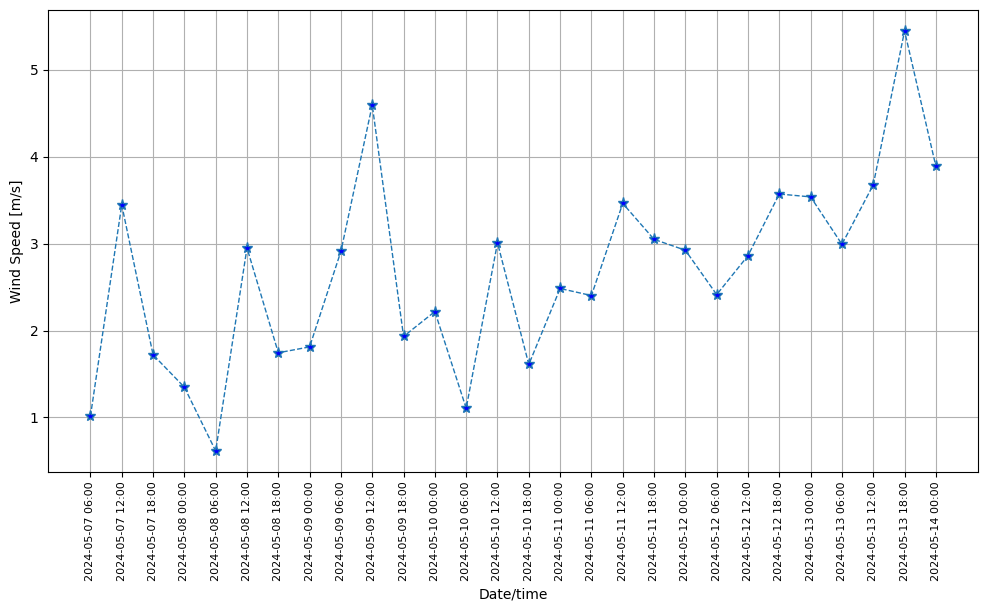

In [13]:
# say we want to check if we can kite surf at Akyaka, Turkey
# we have a nice plotting module to plot wind speed at a location

from skyrim.libs.plotting import plot_wind_speed

akyaka_coords = {"lat": 37.0557, "lon": 28.3242}
ax = plot_wind_speed(**akyaka_coords, rollout_snapshots=pred_paths)